<a href="https://colab.research.google.com/github/boazgajja/-Realtime-Ecommerce-Data-Pipeline-Analaytics-Dashboard/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


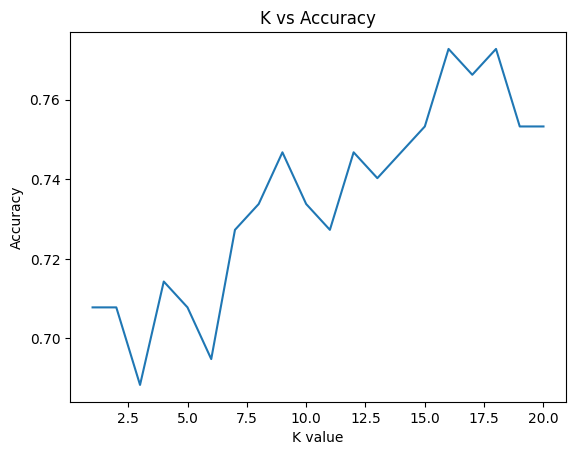


Optimal K Value: 16 with Accuracy: 77.27%

Confusion Matrix:
0.0: {0.0: 94, 1.0: 7}
1.0: {0.0: 28, 1.0: 25}


In [12]:
import numpy as np
import random
import math
import csv
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd

# Step 1: Start

# Step 2: Load dataset from Google Drive CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/CSE 303/LAB7:decision tree/diabetes.csv'

# Load the dataset using pandas
data_df = pd.read_csv(file_path)

# Convert the DataFrame to a NumPy array (assuming the last column is the label)
dataset_new = data_df.values

# Step 4: Split the data for training and testing (80% and 20%)
def split_data(dataset_new, split_ratio=0.2):
    dataset_list = dataset_new.tolist()
    random.shuffle(dataset_list)
    split_idx = int(len(dataset_list) * (1 - split_ratio))
    return np.array(dataset_list[:split_idx]), np.array(dataset_list[split_idx:])

train_set_new, test_set_new = split_data(dataset_new)

# Step 5: To find distance, use Euclidean distance from point A to point B
def euclidean_dist(point_a, point_b):
    return math.sqrt(sum((float(a) - float(b))**2 for a, b in zip(point_a[:-1], point_b[:-1])))

# Step 6: Compute distance between test points and all other points and store in an array/map
def knn_predictor(train_set_new, test_instance_new, k_value):
    dist_list_new = [(train_instance_new, euclidean_dist(test_instance_new, train_instance_new)) for train_instance_new in train_set_new]

    # Step 7: Sort them in ascending order
    dist_list_new.sort(key=lambda x: x[1])

    # Step 8: Select K nearest neighbors from the sorted list
    nearest_neighbors_new = [dist_list_new[i][0][-1] for i in range(k_value)]

    # Step 9: Confirm majority from K nearest neighbors
    majority_vote_new = Counter(nearest_neighbors_new).most_common(1)[0][0]
    return majority_vote_new

# Step 10: Repeat steps 6-9 for each instance
def knn_classifier(train_set_new, test_set_new, k_value):
    predictions_new = []
    for test_instance_new in test_set_new:
        predictions_new.append(knn_predictor(train_set_new, test_instance_new, k_value))
    return predictions_new

# Step 11: Evaluate the model performance by number of correct predictions
def calculate_accuracy_new(test_set_new, predictions_new):
    correct_predictions_new = sum(1 for i, test_instance_new in enumerate(test_set_new) if test_instance_new[-1] == predictions_new[i])
    return correct_predictions_new / len(test_set_new)

# Step 12: Confusion matrix
def confusion_matrix_new(test_set_new, predictions_new, classes_new):
    conf_matrix_new = {class_name: {class_name: 0 for class_name in classes_new} for class_name in classes_new}
    for i, test_instance_new in enumerate(test_set_new):
        actual_class_new = test_instance_new[-1]
        predicted_class_new = predictions_new[i]
        conf_matrix_new[actual_class_new][predicted_class_new] += 1
    return conf_matrix_new

# Step 13: Test the model with different values of K
accuracy_values_new = []
max_neighbors_new = 20

for k_value in range(1, max_neighbors_new + 1):
    predictions_list_new = knn_classifier(train_set_new, test_set_new, k_value)
    accuracy_value_new = calculate_accuracy_new(test_set_new, predictions_list_new)
    accuracy_values_new.append(accuracy_value_new)

# Step 14: Calculate accuracy in each step, plot the graph (K vs Accuracy)
plt.plot(range(1, max_neighbors_new + 1), accuracy_values_new)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

# Step 15: Choose K that has the highest accuracy
best_k_new = accuracy_values_new.index(max(accuracy_values_new)) + 1
best_accuracy_new = max(accuracy_values_new)

# Final predictions and accuracy with the best K
final_predictions_new = knn_classifier(train_set_new, test_set_new, best_k_new)
final_accuracy_new = calculate_accuracy_new(test_set_new, final_predictions_new)

# Step 16: Stop

# Confusion Matrix
class_labels_new = np.unique(dataset_new[:, -1])
conf_matrix_result_new = confusion_matrix_new(test_set_new, final_predictions_new, class_labels_new)

# Displaying results
print(f"\nOptimal K Value: {best_k_new} with Accuracy: {best_accuracy_new * 100:.2f}%\n")

# Confusion Matrix Output
print("Confusion Matrix:")
for actual_class_new, row_new in conf_matrix_result_new.items():
    print(f"{actual_class_new}: {row_new}")
